Pie Charts, Box Plots, Scatter Plots, and Bubble Plots


In [ ]:
Importing Libraries

In [1]:
#Import primary modules.
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

#Importing Matplotlib
#%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0


Matplotlib version:  3.5.3


Importing Data 
Dataset: Immigration to Canada from 1980 to 2013 - International migration flows to and from selected countries - The 2015 revision from United Nation's website.
In this lab, we will focus on the Canadian Immigration data and use the already cleaned dataset and can be fetched from here.

You can refer to the lab on data pre-processing wherein this dataset is cleaned for a quick refresh your Panads skill Data pre-processing with Pandas

In [2]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')
df_can.head()

Data read into a pandas dataframe!


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [3]:
#Let's find out how many entries there are in our dataset.
# print the dimensions of the dataframe
print(df_can.shape)

(195, 39)


(195, 39)
data dimensions: (195, 38)
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


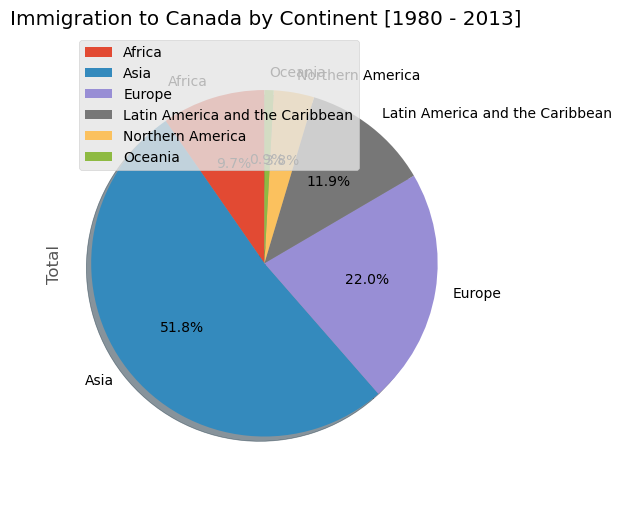

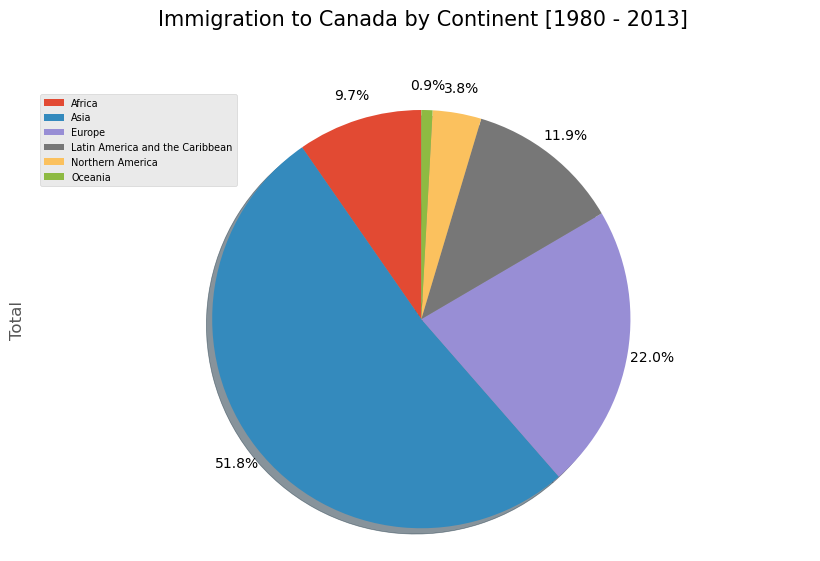

In [4]:
#Import primary modules.
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

import matplotlib as mpl
import matplotlib.pyplot as plt


df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

df_can.head()
print(df_can.shape)

#For plotting the data easilty, let's first set the country name as index - 
#useful for quickly looking up countries using .loc method.

df_can.set_index('Country', inplace=True)

# Let's view the first five elements and see how the dataframe was changed
df_can.head()
print('data dimensions:', df_can.shape)

#let's create a list of years from 1980 - 2013, this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))


# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_continents.index, loc='upper left') 


plt.show()

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            #colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left', fontsize=7) 

plt.show()

Question: Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

Note: You might need to play with the explore values in order to fix any overlapping slice values.

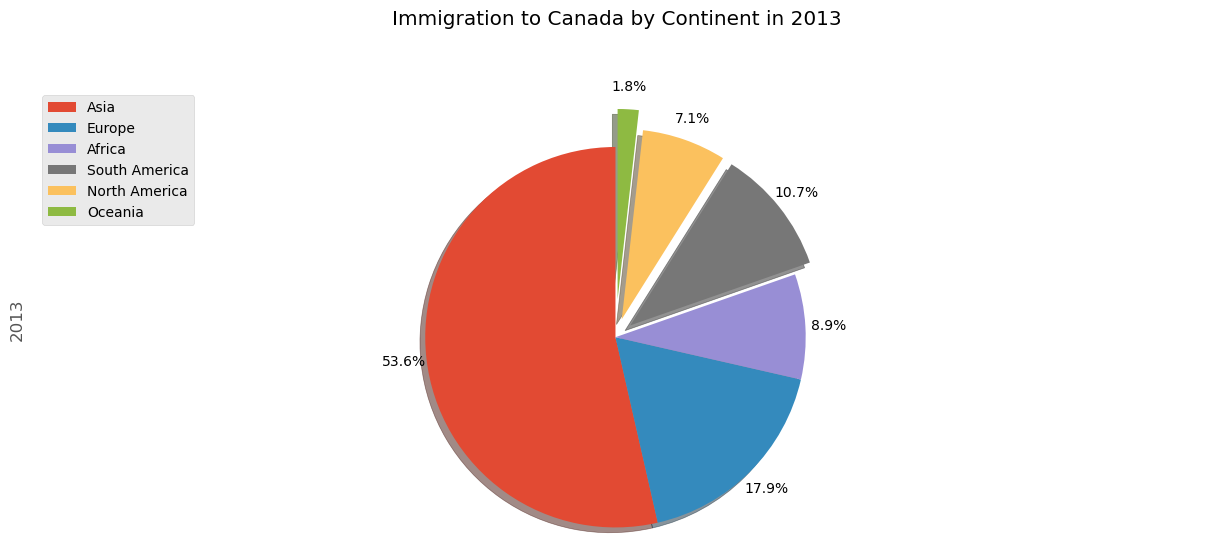

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample Data (Replace this with actual data)
data = {
    'Continent': ['Asia', 'Europe', 'Africa', 'South America', 'North America', 'Oceania'],
    '2013': [150000, 50000, 25000, 30000, 20000, 5000]
}

# Convert dictionary to DataFrame and set index
df_continents = pd.DataFrame(data)
df_continents.set_index('Continent', inplace=True)

# Define explode values
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2]  # Offsetting specific slices

# Plot pie chart
plt.figure(figsize=(15, 6))
df_continents['2013'].plot(kind='pie',
                           autopct='%1.1f%%', 
                           startangle=90,    
                           shadow=True,       
                           labels=None,  # Turn off default labels on pie chart
                           pctdistance=1.12,  # Adjust text label placement
                           explode=explode_list  # Offset slices
                           )

# Scale title position to match label distance
plt.title('Immigration to Canada by Continent in 2013', y=1.12)
plt.axis('equal')  # Ensure pie chart is circular

# Add legend
plt.legend(labels=df_continents.index, loc='upper left')

# Show plot
plt.show()


Box Plots 
A box plot is a way of statistically representing the distribution of the data through five main dimensions:

Minimum: The smallest number in the dataset excluding the outliers.
First quartile: Middle number between the minimum and the median.
Second quartile (Median): Middle number of the (sorted) dataset.
Third quartile: Middle number between median and maximum.
Maximum: The largest number in the dataset excluding the outliers.

To make a boxplot, we can use kind=box in plot method invoked on a pandas series or dataframe.

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

Step 1: Get the subset of the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the dataframe.describe() method to view the percentiles.

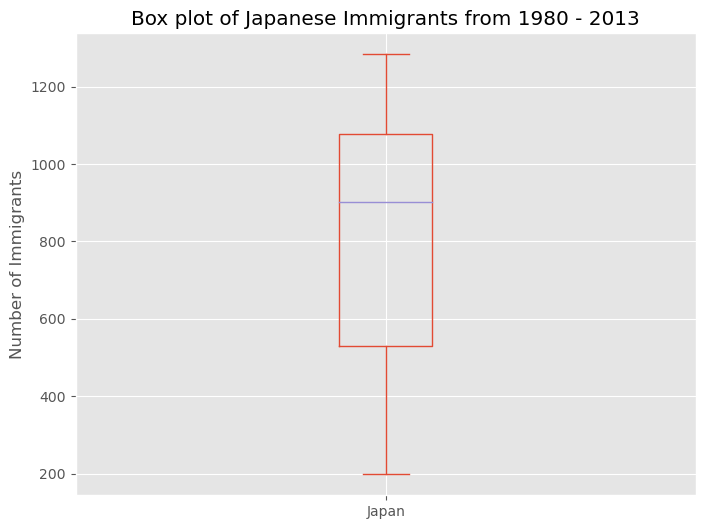

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [8]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

#Plot by passing in kind='box'.
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

#We can view the actual numbers by calling the describe() method on the dataframe.
df_japan.describe()

In [ ]:
#Question: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

#Step 1: Get the dataset for China and India and call the dataframe df_CI.

df_CI= df_can.loc[['China', 'India'], years].transpose()
    df_CI.head()
    
    
#Let's view the percentiles associated with both countries using the describe() method.
df_CI.describe()

#Step 2: Plot data.

df_CI.plot(kind='box', figsize=(10, 7))

    plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
    plt.ylabel('Number of Immigrants')

    plt.show()
    
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()    
    

Available Years in Dataset: ['1980', '1981', '1982', '2011', '2012'] ... ['1981', '1982', '2011', '2012', '2013']
Using Years: ['1980', '1981', '1982', '2011', '2012'] ... ['1981', '1982', '2011', '2012', '2013']
Checking Index:
Index(['China', 'India'], dtype='object', name='Country')
Found Countries: ['China', 'India']
Country  China  India
1980      5000   8000
1981      6000   9000
1982      7000   9500
2011     32000  45000
2012     35000  47000


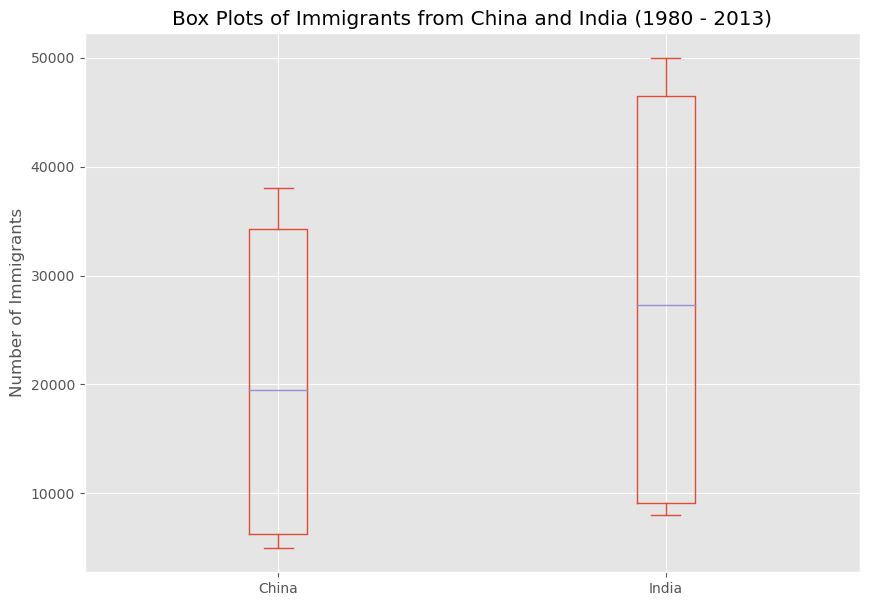

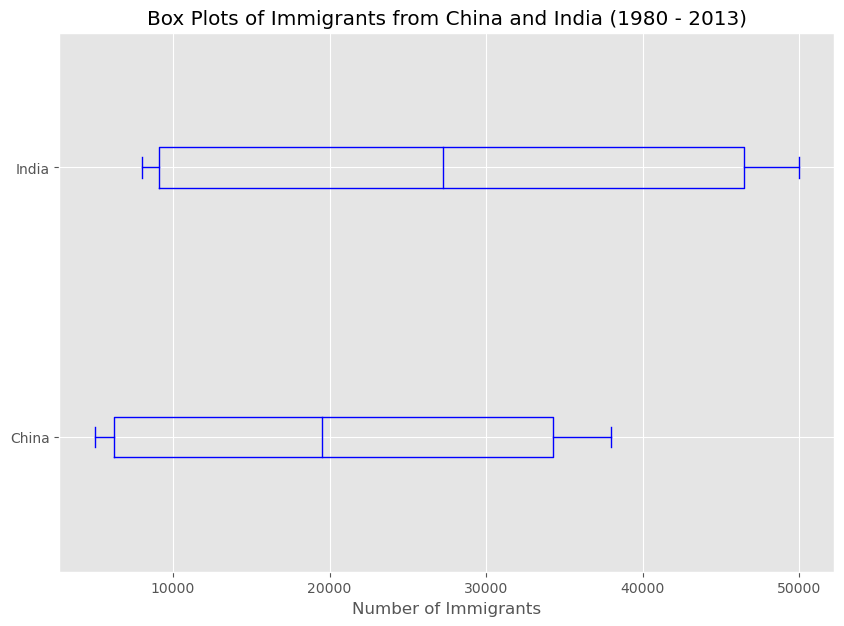

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert all column names (years) to **strings** to avoid mismatches
df_can.columns = df_can.columns.astype(str)

# Strip any spaces from country names in the index
df_can.index = df_can.index.str.strip()

# Check available years in df_can
available_years = [col for col in df_can.columns if col.isdigit()]  # Only numeric columns (years)
print(f"Available Years in Dataset: {available_years[:5]} ... {available_years[-5:]}")  # Preview

# Define the range of years **only if they exist in df_can**
years = [str(year) for year in range(1980, 2014) if str(year) in df_can.columns]
print(f"Using Years: {years[:5]} ... {years[-5:]}")  # Debugging Output

# Check if 'China' and 'India' are in the index
print("Checking Index:")
print(df_can.index)

# Extract data for China and India **only if they exist in the index**
selected_countries = [country for country in ['China', 'India'] if country in df_can.index]
print(f"Found Countries: {selected_countries}")

# Extract data only if both countries are found
if selected_countries:
    df_CI = df_can.loc[selected_countries, years].transpose()
    print(df_CI.head())  # Display first few rows
else:
    print("Error: One or both country names not found in dataset!")

# Proceed with plotting if df_CI is valid
if not df_CI.empty:
    # Vertical box plot
    df_CI.plot(kind='box', figsize=(10, 7))
    plt.title('Box Plots of Immigrants from China and India (1980 - 2013)')
    plt.ylabel('Number of Immigrants')
    plt.show()

    # Horizontal box plot
    df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)
    plt.title('Box Plots of Immigrants from China and India (1980 - 2013)')
    plt.xlabel('Number of Immigrants')
    plt.show()


Subplots

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots, each containing a plot. With subplots, we usually work with the artist layer instead of the scripting layer.

Typical syntax is :

    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
Where

nrows and ncols are used to notionally split the figure into (nrows * ncols) sub-axes,
plot_number is used to identify the particular subplot that this function is to create within the notional grid. plot_number starts at 1, increments across rows first and has a maximum of nrows * ncols as shown below.
Image
We can then specify which subplot to place each plot by passing in the ax paramemter in plot() method as follows:

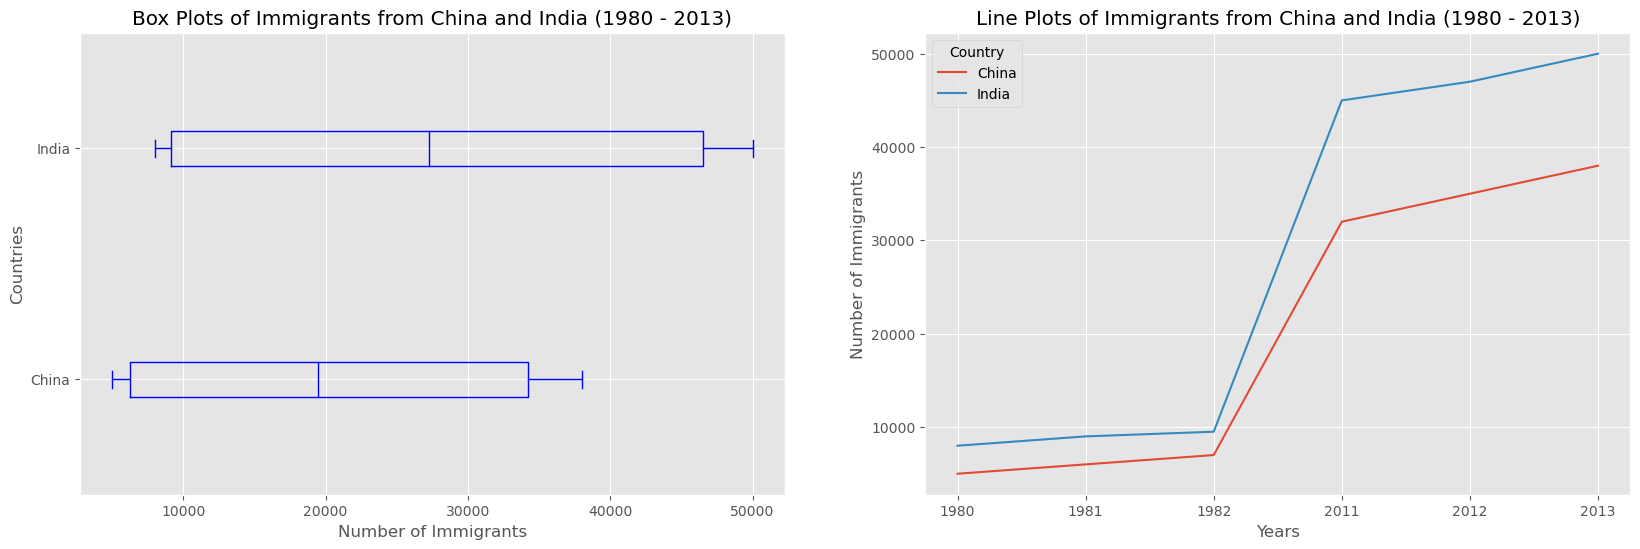

In [22]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [ ]:

#Question: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration)
#grouped by the decades 1980s, 1990s, and 2000s.

import pandas as pd
import matplotlib.pyplot as plt

df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

#Question: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration)
#grouped by the decades 1980s, 1990s, and 2000s.

#Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe df_top15.
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
    df_top15
    
#Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:

#Create a list of all years in decades 80's, 90's, and 00's.
#Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
#Merge the three series into a new data frame. Call your dataframe new_df.

# create a list of all years in decades 80's, 90's, and 00's
    years_80s = list(map(str, range(1980, 1990))) 
    years_90s = list(map(str, range(1990, 2000))) 
    years_00s = list(map(str, range(2000, 2010))) 

    # slice the original dataframe df_can to create a series for each decade
    df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
    df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
    df_00s = df_top15.loc[:, years_00s].sum(axis=1)

    # merge the three series into a new data frame
    new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

    # display dataframe
    new_df.head()
#the statistics associated with the dataframe using the describe() method.
new_df.describe()

#Step 3: Plot the box plots.

new_df.plot(kind='box', figsize=(10, 6))

    plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

    plt.show()
    
# let's check how many entries fall above the outlier threshold  
new_df=new_df.reset_index()
    new_df[new_df['2000s']> 209611.5]


Scatter Plots 
A scatter plot (2D) is a useful method of comparing variables against each other. Scatter plots look similar to line plots in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

Let's start by exploring the following:

Using a scatter plot, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

Step 1: Get the dataset. Since we are expecting to use the relationship betewen years and total population, we will convert years to int type.

   year   total
0  1980   99137
1  1981  110563
2  1982  104271
3  1983   75550
4  1984   73417


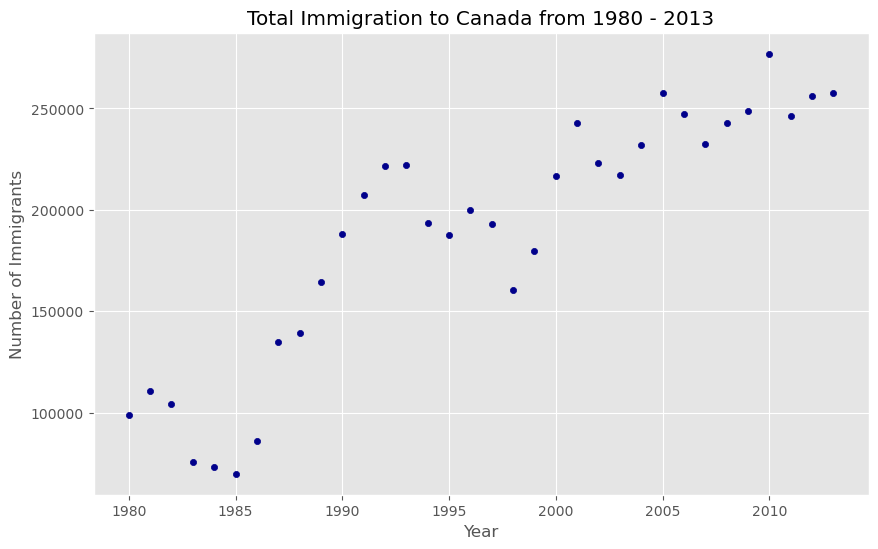

In [33]:
import matplotlib.pyplot as plt
import pandas as pd


df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

# Step 1: Calculate total immigration per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# Change the year columns to integer type (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# Reset the index to put the year back as a column
df_tot.reset_index(inplace=True)

# Rename columns for better readability
df_tot.columns = ['year', 'total']

# View the first few rows
print(df_tot.head())

# Step 2: Plot the data using a scatter plot
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# Adding labels and title
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Display the plot
plt.show()



So let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following:

x: x-coordinates of the data.
y: y-coordinates of the data.
deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

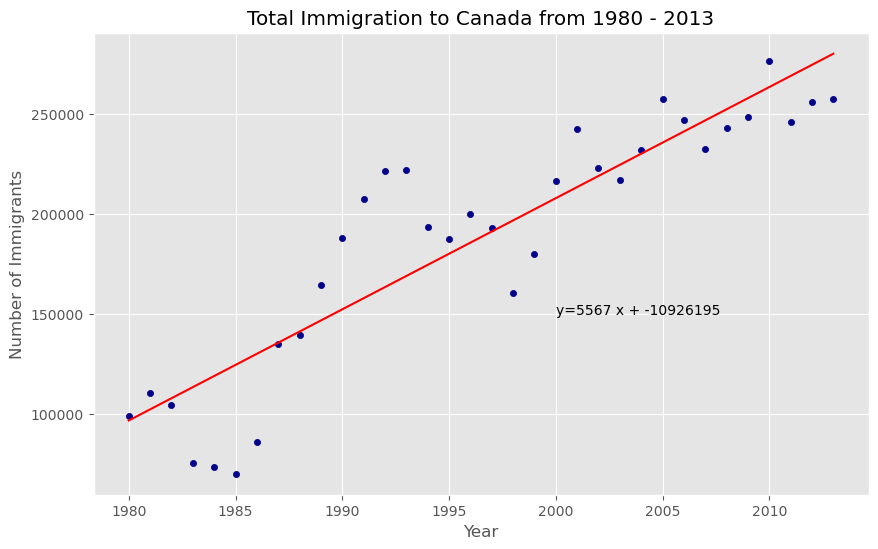

'No. Immigrants = 5567 * Year + -10926195'

In [35]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

#Step 2: Plot the regression line on the scatter plot.
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Question: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:

Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it df_countries.
Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe df_total.
Reset the index in place.
Rename the columns to year and total.
Display the resulting dataframe.

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')
          Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  174

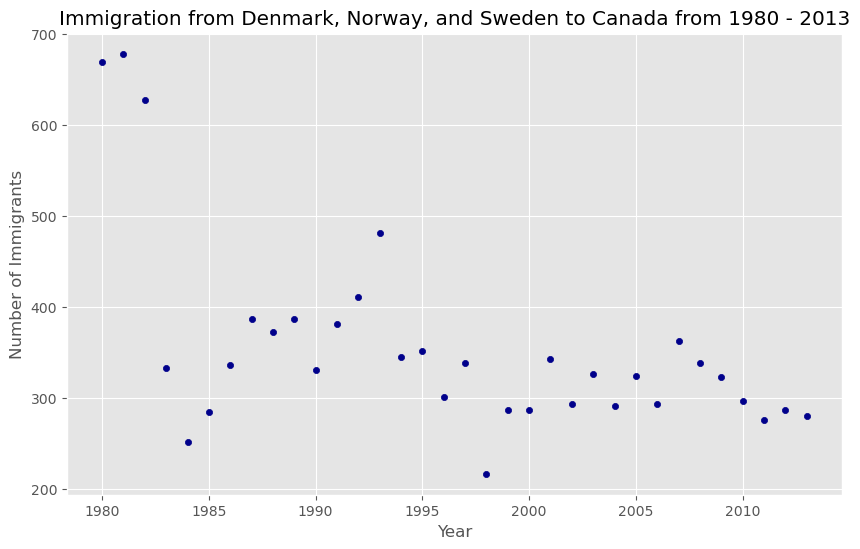

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

# Check the column names to find the country names column
print(df_can.columns)

# Check the first few rows to identify how country names are stored
print(df_can.head())

# Define the range of years (1980-2013) in the dataset
years = list(map(str, range(1980, 2014)))  # This will generate a list of years as strings

# Step 1: Create df_countries for Denmark, Norway, and Sweden (make sure country names are correct)
df_countries = df_can[df_can['Country'].isin(['Denmark', 'Norway', 'Sweden'])][years]

# Sum immigration numbers across all three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=0))

# Reset index in place
df_total.reset_index(inplace=True)

# Rename columns
df_total.columns = ['year', 'total']

# Change the 'year' column from string to int for proper plotting
df_total['year'] = df_total['year'].astype(int)

# Display the resulting dataframe
print(df_total.head())

# Step 2: Generate the scatter plot
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# Add title and labels to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Display the plot
plt.show()


Bubble Plots 
A bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable z, also known as the weight. In maplotlib, we can pass in an array or scalar to the parameter s to plot(), that contains the weight of each point.

Let's start by analyzing the effect of Argentina's great depression.

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the normalized value of the population for each year.

In [ ]:
#Step 1: Get the data for Brazil and Argentina. Like in the previous example, 
#we will convert the Years to type int and include it in the dataframe.

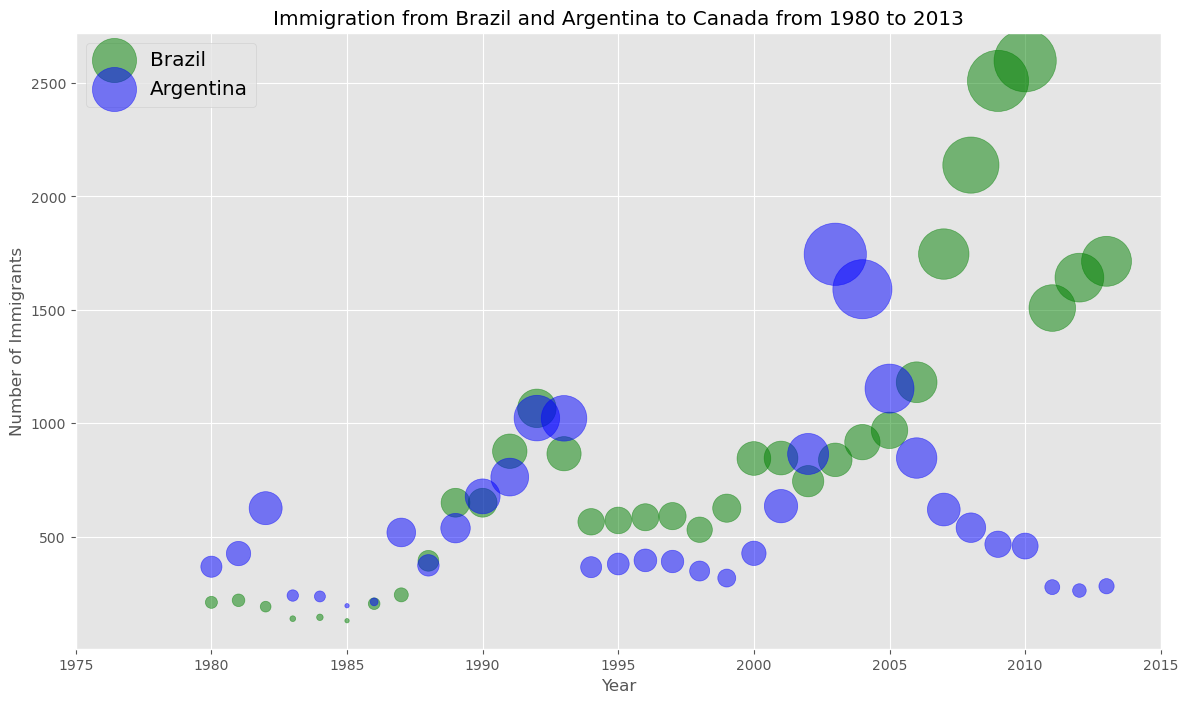

In [52]:
# Step 1: Filter the data for Brazil and Argentina
df_brazil = df_can[df_can['Country'] == 'Brazil'][years].transpose()
df_argentina = df_can[df_can['Country'] == 'Argentina'][years].transpose()

# Combine Brazil and Argentina data into a single dataframe
df_countries = pd.concat([df_brazil, df_argentina], axis=1)

# Reset index to treat the years as a column
df_countries.reset_index(inplace=True)

# Rename columns
df_countries.columns = ['Year', 'Brazil', 'Argentina']

# Convert the 'Year' column to int
df_countries['Year'] = df_countries['Year'].astype(int)

# Step 2: Normalize the data for plotting
norm_brazil = (df_countries['Brazil'] - df_countries['Brazil'].min()) / (df_countries['Brazil'].max() - df_countries['Brazil'].min())
norm_argentina = (df_countries['Argentina'] - df_countries['Argentina'].min()) / (df_countries['Argentina'].max() - df_countries['Argentina'].min())

# Step 3: Plot the data
ax0 = df_countries.plot(kind='scatter',
                        x='Year',
                        y='Brazil',
                        figsize=(14, 8),
                        alpha=0.5,
                        color='green',
                        s=norm_brazil * 2000 + 10,  # Pass in weights
                        xlim=(1975, 2015)
                        )

ax1 = df_countries.plot(kind='scatter',
                        x='Year',
                        y='Argentina',
                        alpha=0.5,
                        color="blue",
                        s=norm_argentina * 2000 + 10,
                        ax=ax0
                        )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina to Canada from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

# Show the plot
plt.show()


Question: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use df_can_t that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

Index(['Year', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=196)
0    5123
1    6682
2    3308
3    1863
4    1527
Name: China, dtype: int64
0    8880
1    8670
2    8147
3    7338
4    5704
Name: India, dtype: int64


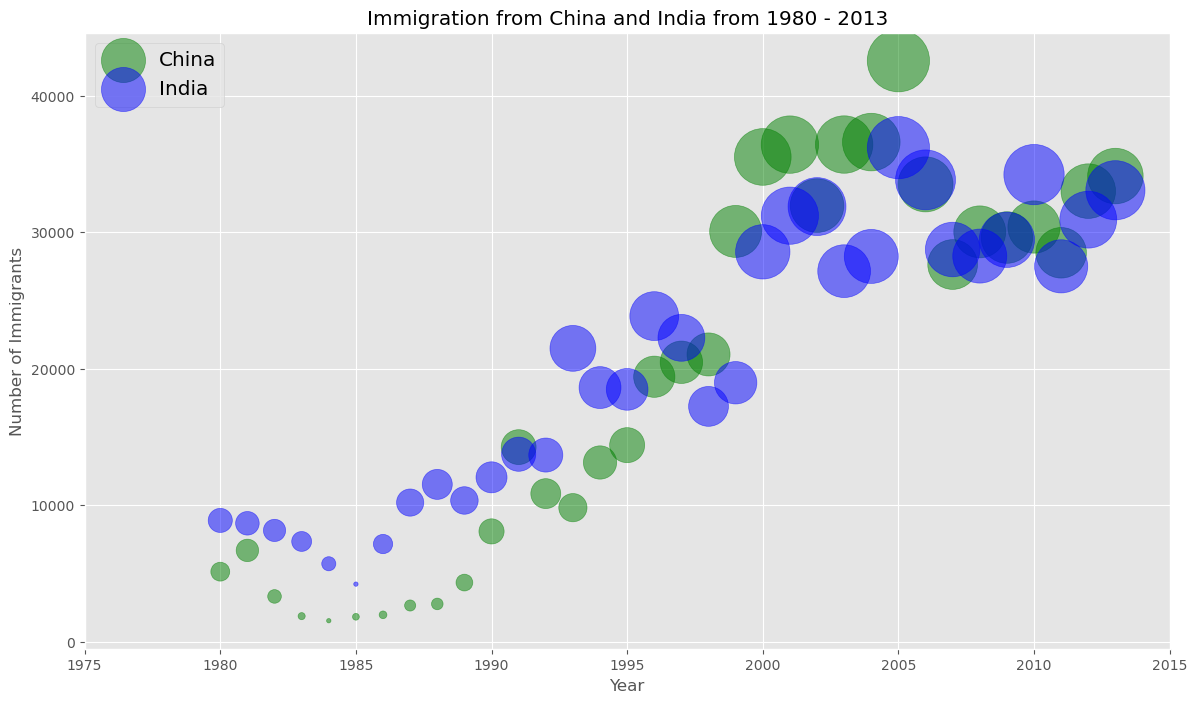

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

# Define the range of years (1980-2013) in the dataset
years = list(map(str, range(1980, 2014)))  # This will generate a list of years as strings

# Set 'Country' as the index
df_can.set_index('Country', inplace=True)

# Transpose the dataset
df_can_t = df_can[years].transpose()

# Cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# Label the index
df_can_t.index.name = 'Year'

# Reset the index to bring 'Year' as a column
df_can_t.reset_index(inplace=True)


print(df_can_t.columns)  # Check available columns after transpose
print(df_can_t['China'].head())  # Check China data
print(df_can_t['India'].head())  # Check India data


# Normalize China data
# Assuming the country name is 'China' after cleaning
# Normalize China data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# Normalize India data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

# Step 2: Generate the bubble plots.

# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')
